In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('finalData.csv')

data_1 = data.copy()
X = data_1.drop('Bankrupt?', axis=1)
y = data_1['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#to compare at the end
reports = {}

## **Baseline Logistic Regression**

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1689
           1       0.00      0.00      0.00        31

    accuracy                           0.98      1720
   macro avg       0.49      0.50      0.49      1720
weighted avg       0.96      0.98      0.97      1720



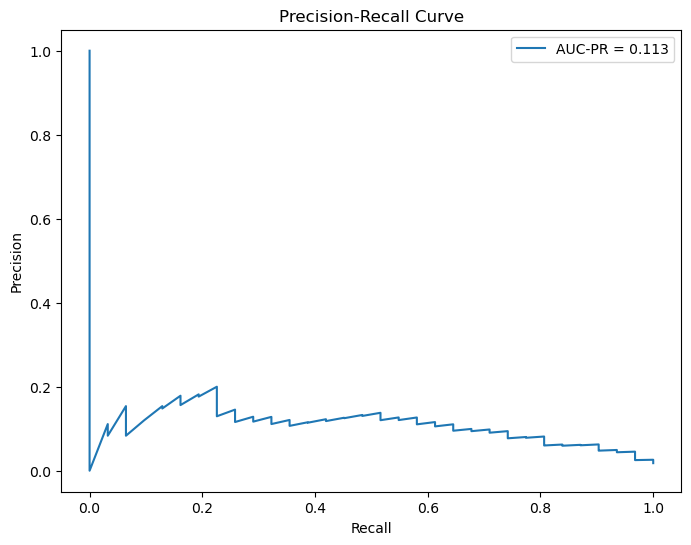

AUC-PR: 0.113


In [11]:

#train model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

#predict
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

#evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

#Precision-Recall Curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auc_pr = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

print(f"AUC-PR: {auc_pr:.3f}")

reports['Baseline Logistic Regression'] = [classification_report(y_test, y_pred),auc_pr]


Due to the **large imbalance** of False cases to True cases of Bankrupt?, the model is unreliable. The high accuracy is a result of simply predicting the majority class. We try to improve minority class precision and recall (Class 1 Precision and Recall).

### **Logistic Regression with class weights**
<br> Class weights assign higher weights to the minority class, penalise misclassification of minority class more heavily.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      1689
           1       0.08      0.81      0.15        31

    accuracy                           0.83      1720
   macro avg       0.54      0.82      0.53      1720
weighted avg       0.98      0.83      0.89      1720



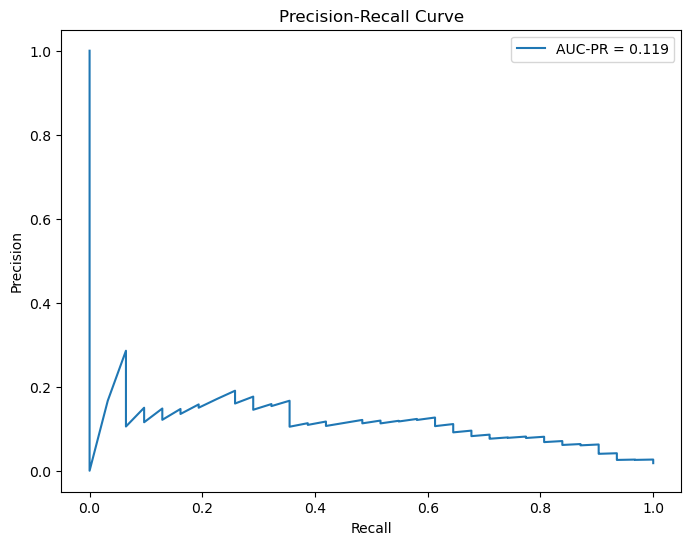

AUC-PR: 0.119


In [12]:

log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

#Precision-Recall Curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auc_pr = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

print(f"AUC-PR: {auc_pr:.3f}")

reports['Logistic Regression with class weights'] = [classification_report(y_test, y_pred),auc_pr]

### **Logistic Regression with SMOTE-ENN**
<br> SMOTE-ENN (Synthetic Minority Over-sampling Technique + Edited Nearest Neighbors) generates synthetic samples for the minority class and remove missclassified samples from both classes.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1689
           1       0.07      0.84      0.13        31

    accuracy                           0.80      1720
   macro avg       0.53      0.82      0.51      1720
weighted avg       0.98      0.80      0.88      1720



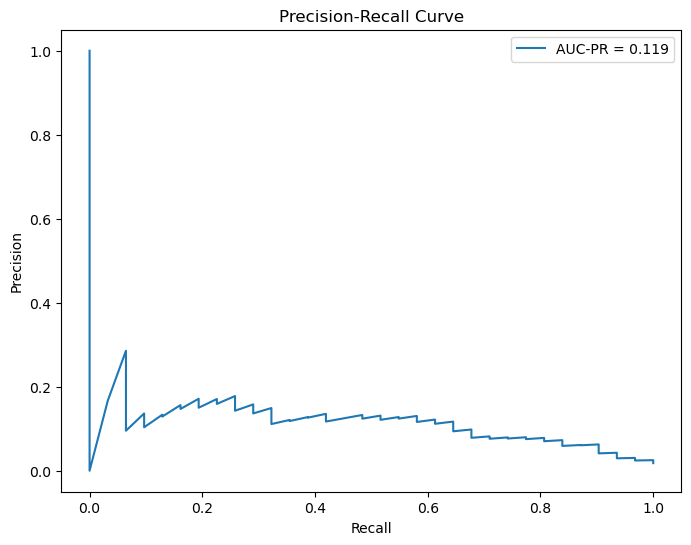

AUC-PR: 0.119


In [13]:
from imblearn.combine import SMOTEENN

#SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)


y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

#Precision-Recall Curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auc_pr = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

print(f"AUC-PR: {auc_pr:.3f}")

reports['Logistic Regression with SMOTE-ENN'] = [classification_report(y_test, y_pred),auc_pr]

### **Logistic Regression with SMOTE**
<br> SMOTE generates synthetic samples for the minority class by interpolating between existing instances. We use just SMOTE to see if it performs better than SMOTE-ENN.

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1689
           1       0.08      0.74      0.14        31

    accuracy                           0.83      1720
   macro avg       0.54      0.79      0.52      1720
weighted avg       0.98      0.83      0.89      1720



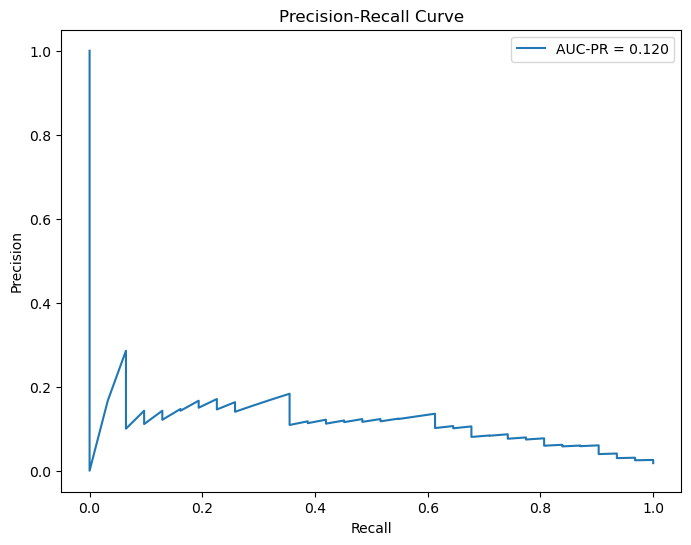

AUC-PR: 0.120


In [14]:
from imblearn.over_sampling import SMOTE

#SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

#Precision-Recall Curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auc_pr = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

print(f"AUC-PR: {auc_pr:.3f}")

reports['Logistic Regression with SMOTE'] = [classification_report(y_test, y_pred),auc_pr]

### **Logistic Regression with Youden's J statistic**
<br> Youden's J maximizes Recall+Specificity−1 to find the optimal threshold for binary classification, adjust the decision threshold to prioritise minority class detection.

Optimal threshold: 0.013
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86      1689
           1       0.06      0.90      0.12        31

    accuracy                           0.75      1720
   macro avg       0.53      0.83      0.49      1720
weighted avg       0.98      0.75      0.84      1720



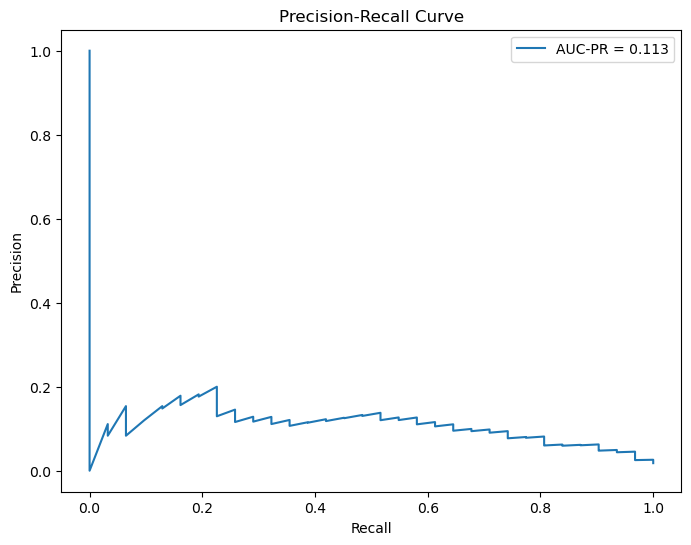

AUC-PR: 0.113


In [15]:
import numpy as np
from sklearn.metrics import roc_curve
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

#Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.3f}")

#apply optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_optimal))

#Precision-Recall Curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auc_pr = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

print(f"AUC-PR: {auc_pr:.3f}")

reports["Logistic Regression with Youden's J statistic"] = [classification_report(y_test, y_pred_optimal),auc_pr]

### **Logistic Regression with SMOTE & class weights & Youden's J statistic**

Optimal threshold: 0.300
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1689
           1       0.06      0.90      0.11        31

    accuracy                           0.75      1720
   macro avg       0.53      0.82      0.48      1720
weighted avg       0.98      0.75      0.84      1720



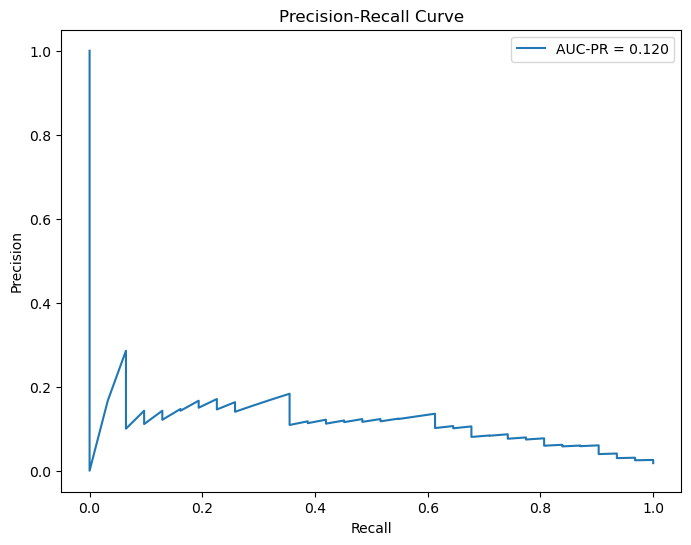

AUC-PR: 0.120


In [16]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)


y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.3f}")

#apply optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_optimal))

precision, recall, _ = precision_recall_curve(y_test, y_prob)
auc_pr = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

print(f"AUC-PR: {auc_pr:.3f}")

reports["Logistic Regression with SMOTE & class weights & Youden's J stats"] = [classification_report(y_test, y_pred_optimal),auc_pr]

## **Compare the results**

In [17]:
for model, results in reports.items():
    print(f"\n{model}")
    print("Classification Report:")
    print(results[0])
    print(f"AUC-PR: {results[1]:.3f}\n")


Baseline Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1689
           1       0.00      0.00      0.00        31

    accuracy                           0.98      1720
   macro avg       0.49      0.50      0.49      1720
weighted avg       0.96      0.98      0.97      1720

AUC-PR: 0.113


Logistic Regression with class weights
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      1689
           1       0.08      0.81      0.15        31

    accuracy                           0.83      1720
   macro avg       0.54      0.82      0.53      1720
weighted avg       0.98      0.83      0.89      1720

AUC-PR: 0.119


Logistic Regression with SMOTE-ENN
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1689
           1       0.07      0.8

## Conclusion

The best variation for Logistic Regression is the variation with class weights, SMOTE and Youden's J Statistic. It accounts for the large imbalance in our data. It modifies the weights of the class, balance the data set through synthetic cases and optimise the classification threshold. This results in a Class 1 Precision of 6%, Class 1 Recall of 90% and a AUC-PR of 0.120, values higher than our baseline model.